# PYPIT vs LowRedux for LRISb

In [2]:
%matplotlib inline

In [3]:
# imports
from scipy import stats
from astropy.io import fits
#
from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
# 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

# debugger
try:
    from xastropy.xutils import xdebug as debugger
except:
    import pdb as debugger

## B400

In [7]:
dpath = '/Users/xavier/PYPIT/TEST_SUITES/LRIS_blue/long_400_3400_d560/'
ldpath = '/Users/xavier/Keck/LRIS/data/Burchett_1233/'
slitb = [20,250,500,1500]

## Load 1D Images

In [5]:
spec1d = dpath+'Science/spec1d_CIV1233-0031_LRISb_2016Jan09T160327.fits'
hdu_spec = fits.open(spec1d)
hdu_spec.info()

Filename: /Users/xavier/PYPIT/TEST_SUITES/LRIS_blue/long_400_3400_d560/Science/spec1d_CIV1233-0031_LRISb_2016Jan09T160327.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    O230-S1460-D02-I0001  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
2    O988-S1460-D02-I0001  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   


In [6]:
pypit_spec = Table(hdu_spec[1].data)
pypit_spec

obj_trace,box_var,box_mask,box_counts,box_sky,box_wave,opt_var,opt_counts,opt_wave
float64,float64,int64,float64,float64,float64,float64,float64,float64
69.5369714969,460.529438043,2,44.9106428217,1.73608228509,1895.81236356,3296.61897663,37.7736671551,1895.81236356
69.5351139938,487.462579212,2,6.64230270939,4.01539790479,1896.70748818,3302.71816415,7.43993310121,1896.70748818
69.5332609272,534.547208019,2,7.1589931466,5.95229139465,1897.60464188,3316.65292761,-8.90764910685,1897.60464188
69.5314122944,514.836936379,2,23.0926515321,4.76767226326,1898.50382259,3337.39284934,26.7679516563,1898.50382259
69.5295680929,541.46443358,2,-36.5336856675,6.79234578483,1899.40502822,3305.64198394,-45.3851493421,1899.40502822
69.52772832,566.352207633,2,17.2009970994,6.83314942954,1900.30825669,3329.37163788,-7.89007709843,1900.30825669
69.525892973,529.312834976,2,-9.81847688072,5.33368448654,1901.21350592,3302.74383161,-23.6233105212,1901.21350592
69.5240620494,479.575315027,2,31.6557351536,3.6094414946,1902.12077384,3312.21846006,31.6271355259,1902.12077384
69.5222355464,502.780556368,2,38.9575769227,4.09610929168,1903.03005837,3322.86588605,28.8512612268,1903.03005837


### LowRedux

In [10]:
low_file = ldpath+'LowRedux/Science/sci-LB.20160109.57204.fits.gz'
lrdx_scihdu = fits.open(low_file)
sciobj = Table(lrdx_scihdu[5].data)[0] # Might have to deal with more than one obj
sciobj

OBJID,SLITID,XFRACPOS,PEAKFLUX,MASKWIDTH,FWHM,FLX_SHFT_WAV,FLX_SHFT_SPA,FWHMFIT [2048],XPOS [2048],YPOS [2048],HAND_AP,HAND_X,HAND_Y,HAND_MINX,HAND_MAXX,HAND_FWHM,HAND_SUB,WAVE_OPT [2048],FLUX_OPT [2048],SIVAR_OPT [2048],IVAR_OPT [2048],SKY_OPT [2048],RN_OPT [2048],NIVAR_OPT [2048],MASK_OPT [2048],FRAC_USE [2048],CHI2 [2048],WAVE_BOX [2048],FLUX_BOX [2048],SIVAR_BOX [2048],IVAR_BOX [2048],NIVAR_BOX [2048],SKY_BOX [2048],RN_BOX [2048],MASK_BOX [2048],MINCOL,MAXCOL,BOX_RAD,ARC_FWHM_FIT [2048],ARC_FWHM_MED,PIX_RES,BINNING [2]
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,int32,float64,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float64,float32,float32,float32,float32,float32,float32,uint8,int32,int32,int16,float32,float64,float64,int32
1,2,0.222582,6.96086,18.1332,4.95559,-1.98,0.924281,4.95559 .. 4.95559,1096.55 .. 1090.65,0.0 .. 2047.0,0,0.0,0.0,0.0,0.0,0.0,0,5773.81946386 .. 1861.80714594,-0.138228 .. 6.11951,0.00586052 .. 0.00871926,0.00526977 .. 0.00960869,131.174 .. 23.4574,9.83275 .. 9.83275,0.00526657 .. 0.00899229,1 .. 1,1.0 .. 1.0,1.338 .. 1.30334,5773.81810467 .. 1861.80762092,20.0669 .. 28.6232,0.00265319 .. 0.00444094,0.00280749 .. 0.00494039,0.00280671 .. 0.00479471,246.125 .. 44.153,13.47 .. 13.47,1 .. 1,1062,1125,7,3.37791 .. 2.42668,3.2788567543,3.2788567543,2 .. 2


## Load 2D Images

### PYPIT

In [11]:
spec2d = dpath+'Science/spec2d_CIV1233-0031_LRISb_2016Jan09T160327.fits'
hdu = fits.open(spec2d)
print(hdu.info())
pypit_var = hdu[5].data # Detector 2
pypit_skysub = hdu[6].data # Detector 2

Filename: /Users/xavier/PYPIT/TEST_SUITES/LRIS_blue/long_400_3400_d560/Science/spec2d_CIV1233-0031_LRISb_2016Jan09T160327.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      10   ()              
1    DET1-PROCESSED  ImageHDU         8   (1024, 2048)   float64   
2    DET1-VAR    ImageHDU         8   (1024, 2048)   float64   
3    DET1-SKYSUB  ImageHDU         8   (1024, 2048)   float64   
4    DET2-PROCESSED  ImageHDU         8   (1024, 2048)   float64   
5    DET2-VAR    ImageHDU         8   (1024, 2048)   float64   
6    DET2-SKYSUB  ImageHDU         8   (1024, 2048)   float64   
None


### LowRedux

In [12]:
lwrdx_wavefile = ldpath+'LowRedux/wave-LB.20160109.14149.fits'
lwrdx_wave = fits.open(lwrdx_wavefile)[0].data
lwrdx_proc = lrdx_scihdu[0].data
lwrdx_ivar = lrdx_scihdu[1].data
lwrdx_sky = lrdx_scihdu[2].data

## Compare Variance Images

In [13]:
var_rtio = pypit_var * lwrdx_ivar[:,1024:]

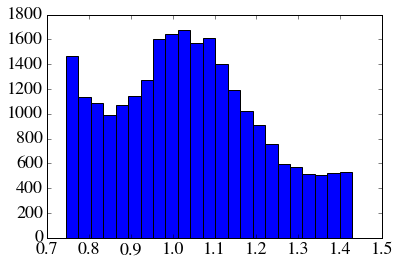

In [14]:
debugger.xhist(var_rtio[:,slitb[0]:slitb[1]], xrng=[0.8, 1.4])#, binsz=0.01)

## Sky Subtraction at Slitb

### PYPIT

In [15]:
pypit_resid = (pypit_skysub/np.sqrt(pypit_var))[slitb[2]:slitb[3],slitb[0]:slitb[1]]

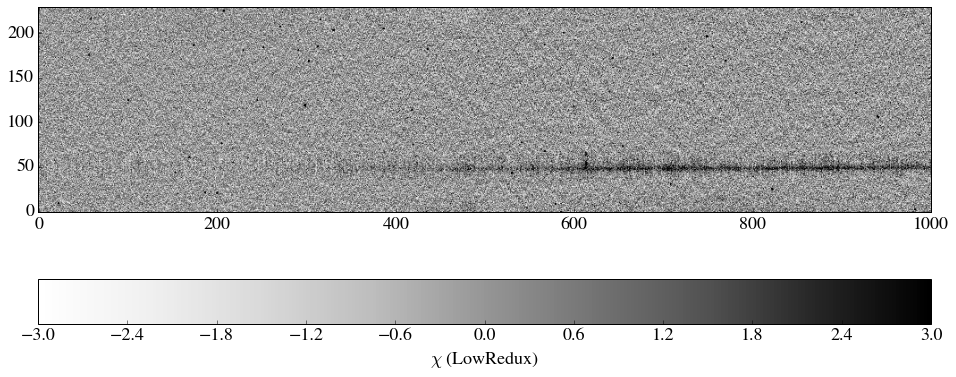

In [16]:
plt.clf()
plt.figure(figsize=(16,8))
#
cm = plt.get_cmap('Greys') 
mplt = plt.imshow(pypit_resid.T, origin='lower', cmap=cm)
mplt.set_clim(vmin=-3, vmax=3.)
cb = plt.colorbar(mplt,orientation='horizontal')
cb.set_label(r'$\chi$ (LowRedux)',fontsize=18.)
#
plt.show()
plt.close()

#### Looks too modeled on the object (poor local skysub, I think)

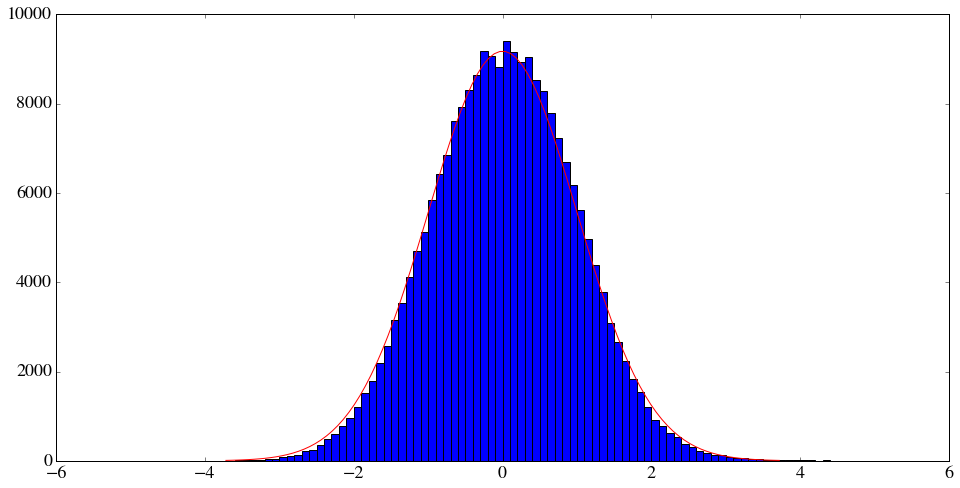

In [17]:
binsz = 0.1
plt.clf()
plt.figure(figsize=(16,8))
ax = plt.gca()
debugger.xhist(pypit_resid,xrng=[-5,5],binsz=binsz,ax=ax)
# PDF for Gaussian
#area = lwrdx_chi.size * binsz
area=pypit_resid.size*binsz
xppf = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
yppf = area*stats.norm.pdf(xppf)
ax.plot(xppf, yppf, 'r-', alpha=1.0)
plt.show()

## Sky Spectrum (wavelength check between PYPIT and LowRedux)

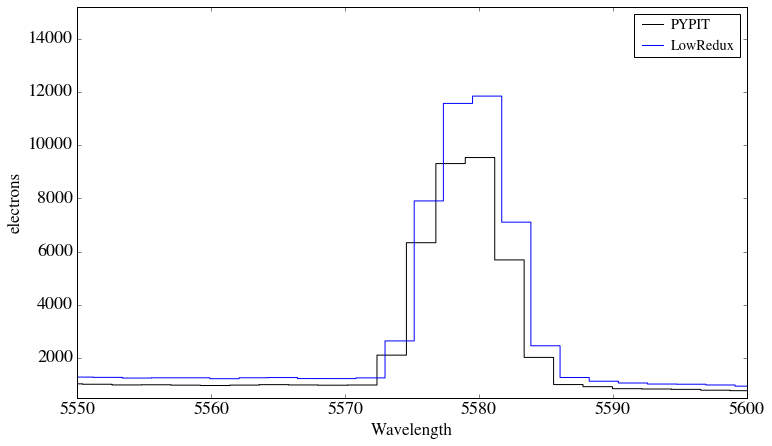

In [25]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()

# PYPIT
ax.plot(pypit_spec['box_wave'], pypit_spec['box_sky']*6, 'k-', drawstyle='steps-mid',label='PYPIT')
# LowRedux
ax.plot(sciobj['WAVE_OPT'], sciobj['SKY_OPT'], '-', color='blue',label='LowRedux', drawstyle='steps-mid')
# Axes
ax.set_xlim(4000.,5700.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))
ax.set_xlim(5550.,5600.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))

ax.set_ylim(500.,15200)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

#### Within 20% of a pixel.  Hard to say who is 'right'..

## Trace

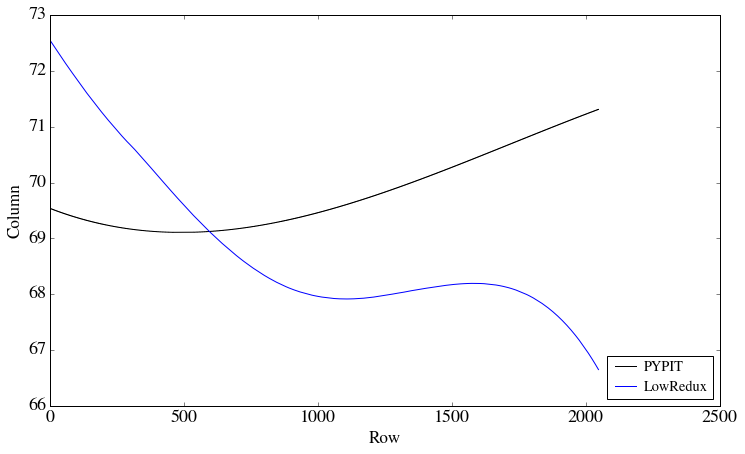

In [26]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
# PYPIT
ax.plot(pypit_spec['obj_trace'], 'k-', drawstyle='steps', label='PYPIT')
# LowRedux
ax.plot(sciobj['XPOS']-1024, '-', color='blue', label='LowRedux')
# Axes
#ax.set_ylim(0.,np.median(pys2n)*2.)
ax.set_xlabel('Row',fontsize=17.)
ax.set_ylabel('Column',fontsize=17.)
# Legend
legend = plt.legend(loc='lower right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

#### Odd..

## Boxcar Extraction

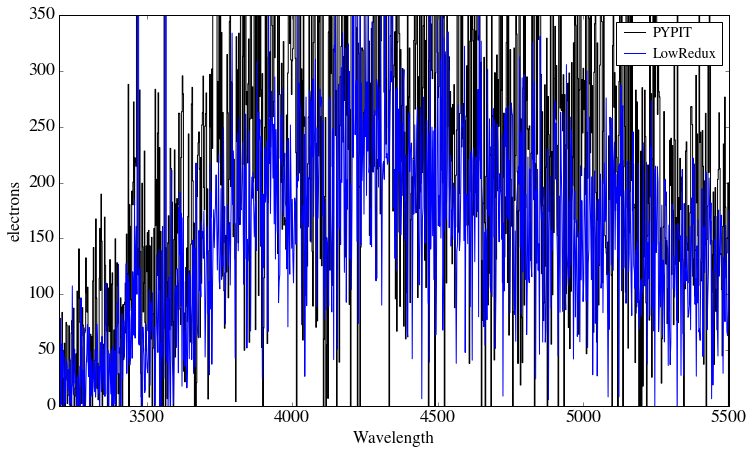

In [29]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['box_counts'])*2.
# PYPIT
ax.plot(pypit_spec['box_wave'], pypit_spec['box_counts'], 'k-', drawstyle='steps',label='PYPIT')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(sciobj['WAVE_BOX'], sciobj['FLUX_BOX'], '-', color='blue',label='LowRedux')
#ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_xlim(np.min(pypit_spec['box_wave']), np.max(pypit_spec['box_wave']))
ax.set_ylim(0.,ymax)
ax.set_xlim(3200, 5500)
ax.set_ylim(0.,350)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

#### PYPIT is showing more flux

    Might be real (definitely is using a wider box)

### Boxcar S/N

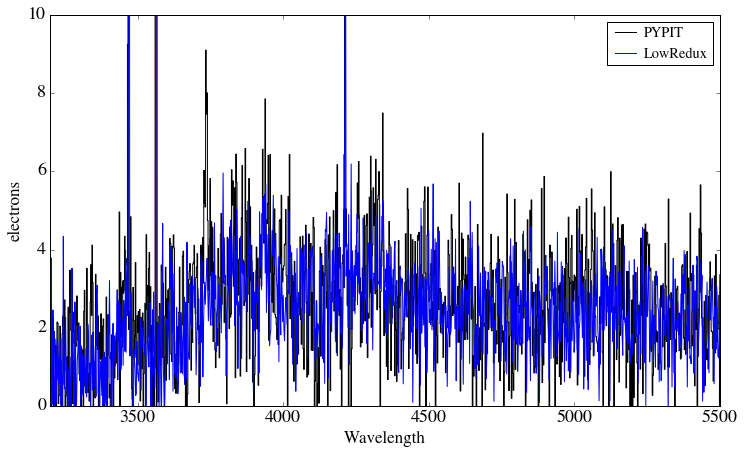

In [35]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['box_counts'])*2.
# PYPIT
ax.plot(pypit_spec['box_wave'], pypit_spec['box_counts']/np.sqrt(pypit_spec['box_var']), 'k-', drawstyle='steps',label='PYPIT')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(sciobj['WAVE_BOX'], sciobj['FLUX_BOX']*np.sqrt(sciobj['IVAR_BOX']), '-', color='blue',label='LowRedux')
#ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_xlim(np.min(pypit_spec['box_wave']), np.max(pypit_spec['box_wave']))
ax.set_ylim(0.,ymax)
ax.set_xlim(3200, 5500)
ax.set_ylim(0.,10)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

## Optimal Extraction

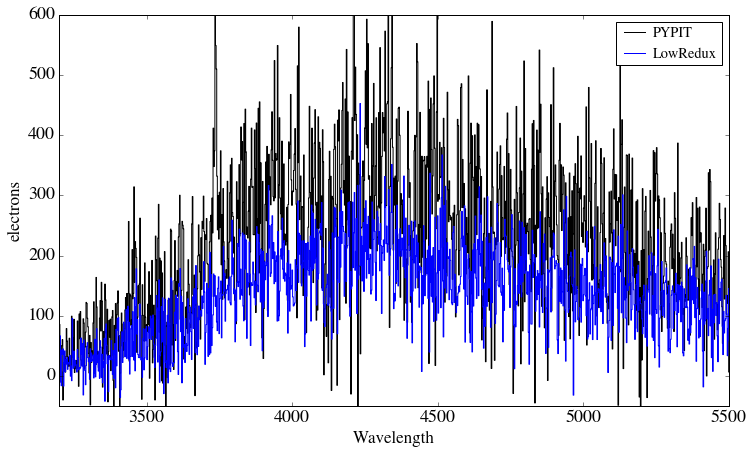

In [32]:
srt = np.argsort(pypit_spec['opt_wave'])
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
# PYPIT
ax.plot(pypit_spec['opt_wave'], pypit_spec['opt_counts'], 'k-', drawstyle='steps-mid',label='PYPIT')

# LowRedux
ax.plot(sciobj['WAVE_OPT'], sciobj['FLUX_OPT'], '-', color='blue',label='LowRedux', drawstyle='steps-mid')

# Axes
ax.set_xlim(3200, 5500)
ax.set_ylim(-50.,600)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

### S/N

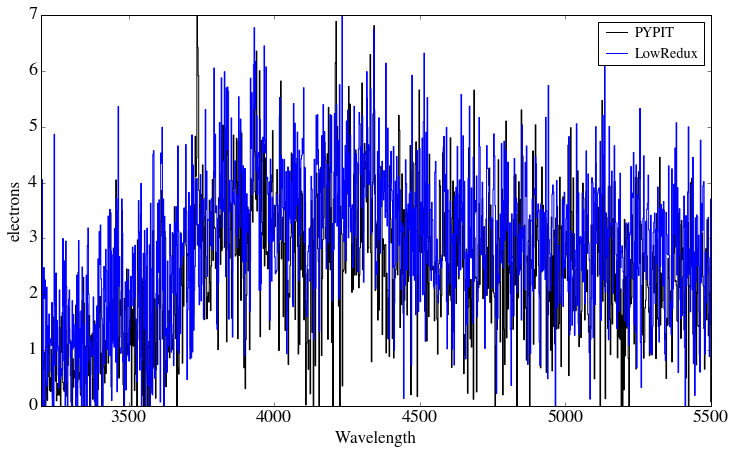

In [38]:
srt = np.argsort(pypit_spec['opt_wave'])
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
# PYPIT
ax.plot(pypit_spec['opt_wave'], pypit_spec['opt_counts']/np.sqrt(pypit_spec['opt_var']), 'k-', drawstyle='steps-mid',label='PYPIT')

# LowRedux
ax.plot(sciobj['WAVE_OPT'], sciobj['FLUX_OPT']*np.sqrt(sciobj['IVAR_OPT']), '-', color='blue',label='LowRedux', drawstyle='steps-mid')

# Axes
ax.set_xlim(3200, 5500)
ax.set_ylim(0.,7)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()